# Assignment 6<br>

[Student Performance](https://archive.ics.uci.edu/dataset/320/student+performance)<br>
This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in two distinct subjects: Mathematics (mat) and Portuguese language (por). In [Cortez and Silva, 2008], the two datasets were modeled under binary/five-level classification and regression tasks. Important note: the target attribute G3 has a strong correlation with attributes G2 and G1. This occurs because G3 is the final year grade (issued at the 3rd period), while G1 and G2 correspond to the 1st and 2nd period grades. It is more difficult to predict G3 without G2 and G1, but such prediction is much more useful (see paper source for more details).


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('C:/Users/Dell/OneDrive/Desktop/student-mat.csv', sep=';')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [60]:
df.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [61]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000
mean,16.666667,2.737745,2.536765,1.448529,2.034314,0.330882,3.953431,3.235294,3.147059,1.465686,2.311275,3.512255,5.723039,10.946078,10.698529,10.416667
std,1.274072,1.098289,1.073981,0.702609,0.825752,0.735767,0.886862,0.993111,1.118502,0.880473,1.312825,1.415897,7.990428,3.308397,3.765849,4.555734
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.750000,0.000000,8.000000,8.000000,8.000000
50%,17.000000,3.000000,3.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [3]:
df.shape

(408, 33)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 408 entries, 0 to 407
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      408 non-null    object
 1   sex         408 non-null    object
 2   age         408 non-null    int64 
 3   address     408 non-null    object
 4   famsize     408 non-null    object
 5   Pstatus     408 non-null    object
 6   Medu        408 non-null    int64 
 7   Fedu        408 non-null    int64 
 8   Mjob        408 non-null    object
 9   Fjob        408 non-null    object
 10  reason      408 non-null    object
 11  guardian    408 non-null    object
 12  traveltime  408 non-null    int64 
 13  studytime   408 non-null    int64 
 14  failures    408 non-null    int64 
 15  schoolsup   408 non-null    object
 16  famsup      408 non-null    object
 17  paid        408 non-null    object
 18  activities  408 non-null    object
 19  nursery     408 non-null    object
 20  higher    

In [64]:
df.nunique()

school         2
sex            2
age            8
address        2
famsize        4
Pstatus        2
Medu           5
Fedu           5
Mjob           5
Fjob           5
reason         4
guardian       3
traveltime     4
studytime      4
failures       4
schoolsup      2
famsup         2
paid           2
activities     2
nursery        2
higher         2
internet       2
romantic       2
famrel         5
freetime       5
goout          5
Dalc           5
Walc           5
health         5
absences      34
G1            17
G2            17
G3            18
dtype: int64

## Null Values

In [65]:
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

## Error Correction

In [66]:
df['famsize'].unique()

array(['GT3', 'LE3', 'GT4', 'LE2'], dtype=object)

In [67]:
df.famsize.value_counts()

famsize
GT3    292
LE3    112
GT4      2
LE2      2
Name: count, dtype: int64

In the data description it is given that 'famsize' can have only 2 values either 'GT3' or 'LE3' 

In [68]:
df[df['famsize']=='LE2']

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
51,GP,F,15,U,LE2,T,4,2,health,other,...,4,3,3,1,1,5,2,11,13,13
92,GP,F,16,U,LE2,T,3,1,other,other,...,3,3,3,2,3,2,4,7,6,6


In [4]:
df.loc[df['famsize']=='LE2', 'famsize'] = 'LE3'

In [5]:
df.famsize.value_counts()

famsize
GT3    292
LE3    114
GT4      2
Name: count, dtype: int64

In [69]:
df[df['famsize']=='GT4']

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
7,GP,F,17,U,GT4,A,4,4,other,teacher,...,4,1,4,1,1,1,6,6,5,6
123,GP,F,15,U,GT4,T,1,2,at_home,services,...,3,2,3,1,2,1,2,16,15,15


In [6]:
df.loc[df['famsize']=='GT4', 'famsize'] = 'GT3'

In [7]:
df.famsize.value_counts()

famsize
GT3    294
LE3    114
Name: count, dtype: int64

## Removing Duplicates

In [8]:
df[df.duplicated()]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
119,GP,M,17,R,GT3,T,1,3,other,other,...,5,2,4,1,4,5,20,9,7,8
120,GP,M,17,R,GT3,T,1,3,other,other,...,5,2,4,1,4,5,20,9,7,8
121,GP,M,17,R,GT3,T,1,3,other,other,...,5,2,4,1,4,5,20,9,7,8
159,GP,M,15,R,GT3,T,2,3,at_home,services,...,4,4,4,1,1,1,2,11,8,8
160,GP,M,15,R,GT3,T,2,3,at_home,services,...,4,4,4,1,1,1,2,11,8,8
161,GP,M,15,R,GT3,T,2,3,at_home,services,...,4,4,4,1,1,1,2,11,8,8
162,GP,M,15,R,GT3,T,2,3,at_home,services,...,4,4,4,1,1,1,2,11,8,8
163,GP,M,15,R,GT3,T,2,3,at_home,services,...,4,4,4,1,1,1,2,11,8,8
164,GP,M,15,R,GT3,T,2,3,at_home,services,...,4,4,4,1,1,1,2,11,8,8
210,GP,F,16,U,GT3,T,4,3,health,other,...,4,3,5,1,5,2,2,16,16,16


In [11]:
no_of_duplicated_rows = df.duplicated().sum()
print(f"Number of duplicated rows = {no_of_duplicated_rows}") if no_of_duplicated_rows else print("No duplicates")

Number of duplicated rows = 13


In [12]:
duplicate_df = df[df.duplicated(keep=False)]
duplicate_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
118,GP,M,17,R,GT3,T,1,3,other,other,...,5,2,4,1,4,5,20,9,7,8
119,GP,M,17,R,GT3,T,1,3,other,other,...,5,2,4,1,4,5,20,9,7,8
120,GP,M,17,R,GT3,T,1,3,other,other,...,5,2,4,1,4,5,20,9,7,8
121,GP,M,17,R,GT3,T,1,3,other,other,...,5,2,4,1,4,5,20,9,7,8
158,GP,M,15,R,GT3,T,2,3,at_home,services,...,4,4,4,1,1,1,2,11,8,8


In [21]:
df = df.drop_duplicates()

In [23]:
df.shape

(395, 33)

In [24]:
df.describe()

,age,traveltime,studytime,failures,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,1.448101,2.035443,0.334177,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,0.697505,0.839240,0.743651,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,1.000000,1.000000,0.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,1.000000,2.000000,0.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,2.000000,2.000000,0.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [25]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,Higher Education,Higher Education,at_home,teacher,...,good,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,Primary Education,Primary Education,at_home,other,...,excellent,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,Primary Education,Primary Education,at_home,other,...,good,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,Higher Education,Pre Secondary Education,health,services,...,normal,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,Secondary Education,Secondary Education,other,other,...,good,3,2,1,2,5,4,6,10,10


In [15]:
df['Medu'].unique()

array([4, 1, 3, 2, 0], dtype=int64)

In [17]:
df['Medu'] = df['Medu'].replace({0: "No Education", 
                    1: "Primary Education", 
                    2: "Pre Secondary Education", 
                    3: "Secondary Education", 
                    4: "Higher Education"
                    })

In [18]:
df['Fedu'] = df['Fedu'].replace({0: "No Education", 
                    1: "Primary Education", 
                    2: "Pre Secondary Education", 
                    3: "Secondary Education", 
                    4: "Higher Education"
                    })

In [20]:
df['famrel'] = df['famrel'].replace({   1: "very bad", 
                                        2 : "bad",
                                        3 : "normal",
                                        4 : "good",
                                        5 : "excellent"})

## Identifying Outliers

C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


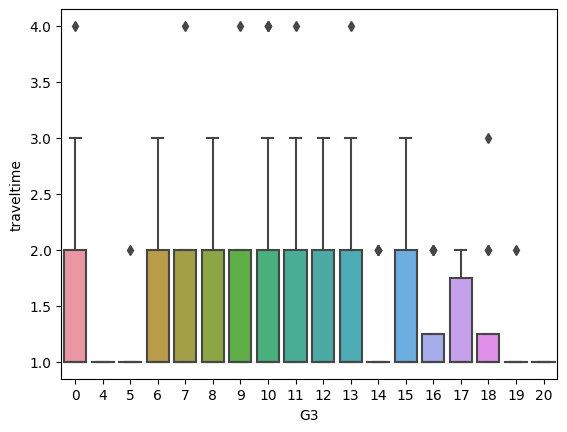

In [57]:
g3_traveltime_boxplot = sns.boxplot(x="G3", y="traveltime", data=df)
plt.show()

C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


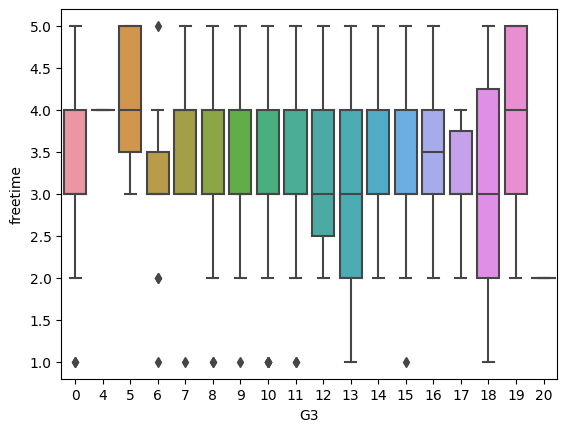

In [58]:
g3_freetime_boxplot = sns.boxplot(x="G3", y="freetime", data=df)
plt.show()

C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


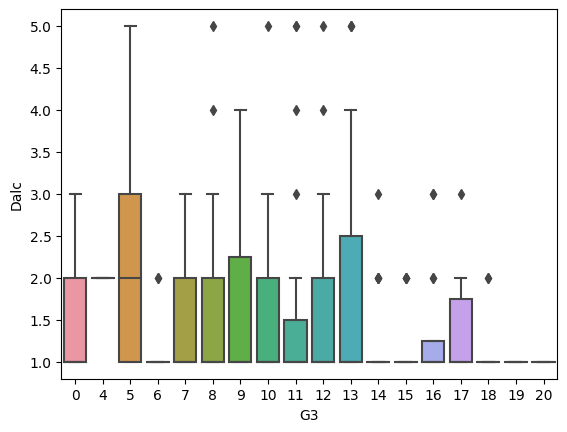

In [59]:
g3_Dalc_boxplot = sns.boxplot(x="G3", y="Dalc", data=df)
plt.show()

## Dropping Outliers

In [66]:
features = ['traveltime', 'freetime', 'Dalc']

In [67]:
def outliers_handling(df_of_features, drop = False):
    for each_feature in df_of_features.columns:
        feature_data = df_of_features[each_feature]
        Q1 = np.percentile(feature_data, 25.) 
        Q3 = np.percentile(feature_data, 75.)
        IQR = Q3-Q1 
        lower_limit = Q1 - (1.5*IQR)
        upper_limit = Q3 + (1.5*IQR)
        upper_outliers = feature_data[feature_data > upper_limit].index.tolist()
        lower_outliers = feature_data[feature_data < lower_limit].index.tolist()
        bad_indices = list(set(upper_outliers + lower_outliers))
        if not drop:
            print(f'For the feature {each_feature}, No of Outliers is {len(bad_indices)}')
        if drop:
            df.drop(outliers, inplace = True, errors = 'ignore')
            print('Outliers from {} feature removed'.format(each_feature))


In [68]:
outliers_handling(df[features])

For the feature traveltime, No of Outliers is 8
For the feature freetime, No of Outliers is 19
For the feature Dalc, No of Outliers is 18


In [69]:
outliers_handling(df[features], drop=True)

Outliers from traveltime feature removed
Outliers from freetime feature removed
Outliers from Dalc feature removed
